Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Siddharth Moharana sm2680"
COLLABORATORS = "Danny Gao dyg21"

---

In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/dyg21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dyg21/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dyg21/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
reviews = pd.read_csv('IMDB Dataset.csv')
print(reviews.head(10))
print(reviews.describe())
reviews['sentiment'].value_counts()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                               

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [4]:
reviews = reviews.drop_duplicates(subset='review', keep='first').reset_index(drop=True)
print(f"Number of reviews after removing duplicates: {len(reviews)}")
reviews['sentiment'].value_counts()

Number of reviews after removing duplicates: 49582


sentiment
positive    24884
negative    24698
Name: count, dtype: int64

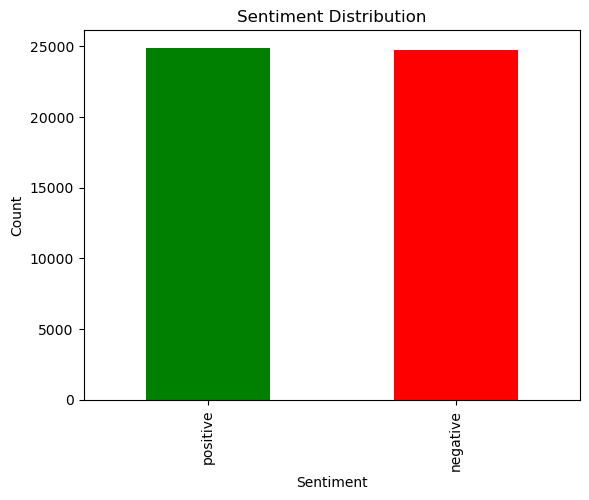

In [5]:
reviews['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
url_pattern = re.compile(r'(https?://|www\.)[^\s]+')

# Define a function for cleaning individual reviews
def clean_review(review):
    if "<" in review and ">" in review:  # Check for HTML
        review = BeautifulSoup(review, "html.parser").get_text()
        
    review = url_pattern.sub('', review)  # Remove URLs
    
    review = re.sub(r"[^a-zA-Z\s]", "", review)  # Remove non-alphabetic
    
    review = review.lower()  # Convert to lowercase
    
    words = word_tokenize(review)  # Tokenize
    
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize
    return " ".join(words)  

reviews['cleaned_review'] = reviews['review'].apply(clean_review)

In [7]:
reviews

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49577,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49579,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49580,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...


In [ ]:
reviews['word_count'] = reviews['cleaned_review'].apply(lambda x: len(x.split()))

positive_reviews = reviews[reviews['sentiment'] == 'positive']
negative_reviews = reviews[reviews['sentiment'] == 'negative']

# Get word count frequencies for each sentiment
positive_freq = positive_reviews['word_count'].value_counts().sort_index()
negative_freq = negative_reviews['word_count'].value_counts().sort_index()

# Create DataFrames for visualization
positive_df = pd.DataFrame({'word_count': positive_freq.index, 'frequency': positive_freq.values, 'sentiment': 'positive'})
negative_df = pd.DataFrame({'word_count': negative_freq.index, 'frequency': negative_freq.values, 'sentiment': 'negative'})

# Combine DataFrames
freq_df = pd.concat([positive_df, negative_df])

plt.figure(figsize=(10, 5))
sns.histplot(positive_reviews['word_count'], kde=True, color='blue', bins=30)
plt.title("Word Count Distribution for Positive Reviews")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Plot distribution for negative reviews
plt.figure(figsize=(10, 5))
sns.histplot(negative_reviews['word_count'], kde=True, color='red', bins=30)
plt.title("Word Count Distribution for Negative Reviews")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
positive_text = " ".join(positive_reviews['cleaned_review'])
negative_text = " ".join(negative_reviews['cleaned_review'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Plot the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

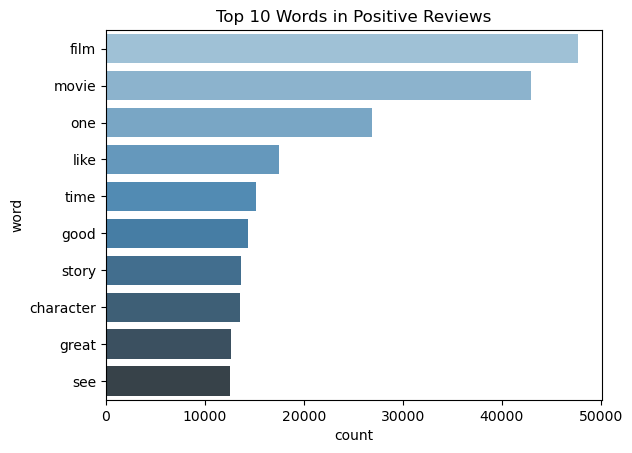

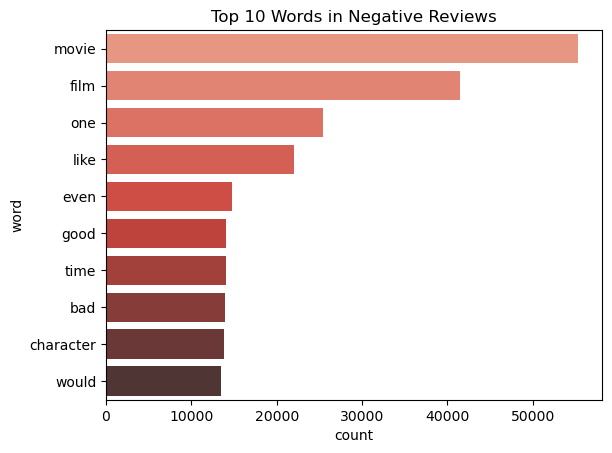

In [10]:
positive_words = Counter(" ".join(positive_reviews['cleaned_review']).split()).most_common(10)
positive_df = pd.DataFrame(positive_words, columns=['word', 'count'])

# Plot positive words
sns.barplot(data=positive_df, x='count', y='word', hue='word', palette='Blues_d', legend=False)
plt.title("Top 10 Words in Positive Reviews")
plt.show()

# Repeat for negative reviews
negative_words = Counter(" ".join(negative_reviews['cleaned_review']).split()).most_common(10)
negative_df = pd.DataFrame(negative_words, columns=['word', 'count'])

sns.barplot(data=negative_df, x='count', y='word', hue='word', palette='Reds_d', legend=False)
plt.title("Top 10 Words in Negative Reviews")
plt.show()


In [11]:
encoder = LabelEncoder()
reviews['sentiment'] = encoder.fit_transform(reviews['sentiment'])  # 0 = Negative, 1 = Positive

In [12]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    reviews['cleaned_review'], 
    reviews['sentiment'],
    test_size=0.2,
    stratify=reviews['sentiment'],
    random_state=42
)

In [13]:
# Convert Text to Feature Vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [14]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_vect, y_train)

LogisticRegression()

In [15]:
# Evaluate the Model
y_pred = model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Test Accuracy: 0.8821
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4940
    Positive       0.87      0.89      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [56]:
def predict_sentiment(review):
    cleaned_review = clean_review(review)
    review_vect = vectorizer.transform([cleaned_review]) 
    prediction = model.predict(review_vect)[0]  
    return 1 if prediction == 1 else 0  

In [52]:
# Test the Prediction Function
print(predict_sentiment("This movie was absolutely amazing!"))
print(predict_sentiment("I hated the movie. It was boring and poorly directed."))

positive
negative


In [47]:
conn = sqlite3.connect('local_movies.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS movies (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        review TEXT NOT NULL,
        sentiment INTEGER NOT NULL
    )
''')

# Commit and close connection
conn.commit()
conn.close()

print("SQLite database and table created successfully!")

SQLite database and table created successfully!


In [48]:
movies = pd.read_csv("movie.csv")

conn = sqlite3.connect('local_movies.db')
cursor = conn.cursor()

for _, row in movies.iterrows():
    cursor.execute("INSERT INTO movies (review, sentiment) VALUES (?, ?)", (row['text'], row['label']))

conn.commit()
conn.close()

print("Reviews and sentiments successfully inserted into SQLite!")

Reviews and sentiments successfully inserted into SQLite!


In [53]:
conn = sqlite3.connect('local_movies.db')
cursor = conn.cursor()

delete_duplicates_query = """
DELETE FROM movies
WHERE id NOT IN (
    SELECT MIN(id)
    FROM movies
    GROUP BY review
);
"""

cursor.execute(delete_duplicates_query)

conn.commit()
conn.close()

In [50]:
conn = sqlite3.connect('local_movies.db')
cursor = conn.cursor()

cursor.execute("SELECT id, review, sentiment FROM movies")
rows = cursor.fetchall()
conn.close()

actual_sentiments = []
predicted_sentiments = []

for review_id, review_text, actual_sentiment in rows:
    predicted_sentiment = predict_sentiment(review_text)
    actual_sentiments.append(actual_sentiment)
    predicted_sentiments.append(predicted_sentiment)

accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90
